<a href="https://colab.research.google.com/github/Brritany/Using-Python-to-Access-Web-Data/blob/main/%E7%B6%B2%E8%B7%AF%E8%B3%87%E6%96%99%E7%88%AC%E5%8F%96%EF%BC%9APython%E7%88%AC%E8%9F%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 使用Python進行網路資料獲取
# Using Python to Access Web Data
___
## Author
> __Yong-Zhen, Huang__  
huang.d841130@gmail.com  
create on August 2022

___


# 一、什麼是網路爬蟲(Crawler) ?
  1. 使用程式向伺服器發送請求(request)，並等待伺服器回傳(response)資料
  2. 對其資料進行解析 & 提取數據
  3. 將所需數據存處在自己的資料庫中
  4. 網路爬蟲(web crawler)即是將上述過程自動化

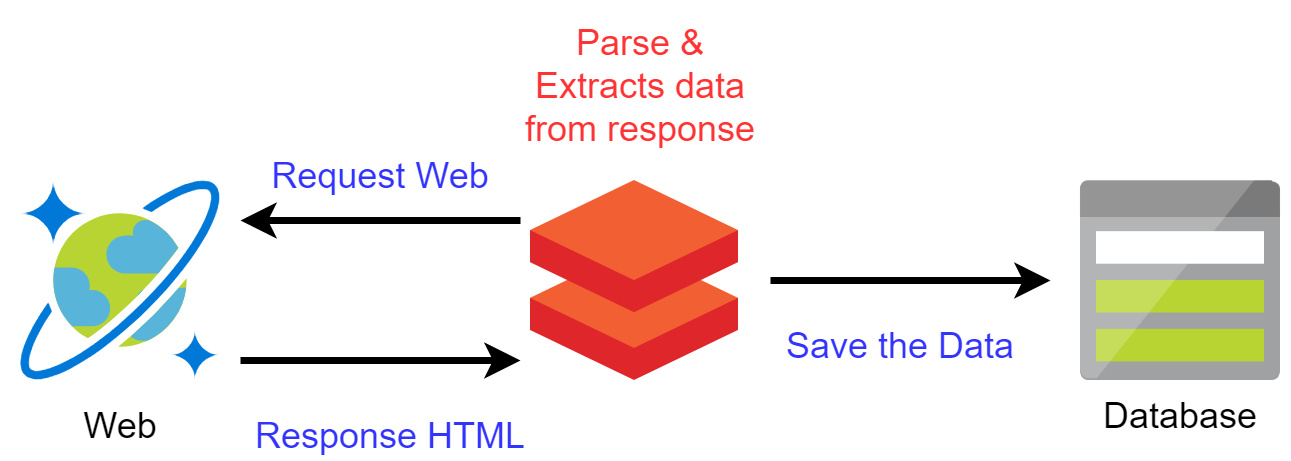

# 二、資料爬取(requests)模組
  * 發送HTTP的請求來取得伺服器回應的資料
  * 常用請求方式
    * `get` & `post`
  

## 語法


```
import requests
回應內容 = requests.請求方式('網址', 參數)
```
* 請求資料為文字時，可用`回應內容.txt`取得值
* 請求資料為二進位檔案時，可用`回應內容.content`取得值


## HTTP狀態碼
  * 1xx：**訊息**。這一類型的狀態碼，代表請求已被接受，需要繼續處理。這類回應是臨時回應，只包含狀態行和某些可選的回應頭資訊，並以空行結束。
  * 2xx：**成功**。這一類型的狀態碼，代表請求已成功被伺服器接收、理解、並接受。
  * 3xx：**重新導向**。這類狀態碼代表需要客戶端採取進一步的操作才能完成請求。通常，這些狀態碼用來重新導向，後續的請求位址（重新導向目標）在本次回應的Location域中指明。
  * 4xx：**客戶端錯誤**。這類的狀態碼代表了客戶端看起來可能發生了錯誤，妨礙了伺服器的處理。除非回應的是一個HEAD請求，否則伺服器就應該返回一個解釋當前錯誤狀況的實體，以及這是臨時的還是永久性的狀況。這些狀態碼適用於任何請求方法。瀏覽器應當向使用者顯示任何包含在此類錯誤回應中的實體內容。
  * 5xx：**伺服器錯誤**。表示伺服器無法完成明顯有效的請求。
  * 參考資料。url = https://zh.wikipedia.org/zh-tw/HTTP%E7%8A%B6%E6%80%81%E7%A0%81

## 範例1 政府資料開放平台 COVID-19各國家地區累積病例數與死亡數
  * https://data.gov.tw/dataset/120449

In [ ]:
# 以requests模組下載資料

import requests
url = 'https://od.cdc.gov.tw/eic/covid19/covid19_global_cases_and_deaths.csv'
r = requests.get(url) 
r.encoding = 'utf-8' # 解碼，避免亂碼的發生
r # 得到HTTP狀態碼，<Response [200]> 表示請求成功

# print(r.text) # 請求資料為文字時，回應內容.txt取得值

# 文字檔案下載
with open('covid-19.csv', 'w') as f:
    f.write(r.text)

### 範例2 圖片下載
  * https://youtu.be/qo3H-VgXmHE
  * https://img.youtube.com/vi/qo3H-VgXmHE/sddefault.jpg

In [ ]:
# youtube封面影片下載
import requests
url = 'https://img.youtube.com/vi/qo3H-VgXmHE/sddefault.jpg'
r = requests.get(url)
with open('ng.jpg', 'wb') as f:
    f.write(r.content)  # 請求資料為二進位檔案時，回應內容.content取得值

## colab才可使用的【指令】
  * 對其想要的圖片，複製影像連結

  * 指令

  ```
  !wget -O 自訂檔名.格式 網址
  ```



In [ ]:
# google logo
!wget -O google.png https://www.google.com/images/branding/googlelogo/1x/googlelogo_color_272x92dp.png


# 三、網頁解析(BeautifulSoup)

## 語法


```
from bs4 import BeautifulSoup
```


```
拆解網頁
BeautifulSoup(變量.text, 'html.parser')
```




## html 網頁架構圖


```
<!doctype html> 聲明文檔類型
<html> lang="zh" 說明採html語言
 <head>  
  <meta charset="utf-8"> 文件類型，聲明編碼格式
  <title>網頁標題</title>
 </head> 
 <body> 
  <h1>標題</h1>
  <div>
  <p>內文段落</p>
  <img src="..." width=?
           height=?>
  <a href="...">連結文字</a>
  </div>
 </body>
</html>
```


```
<p>  內文段落
<img> 圖片
<a>  超連結
```




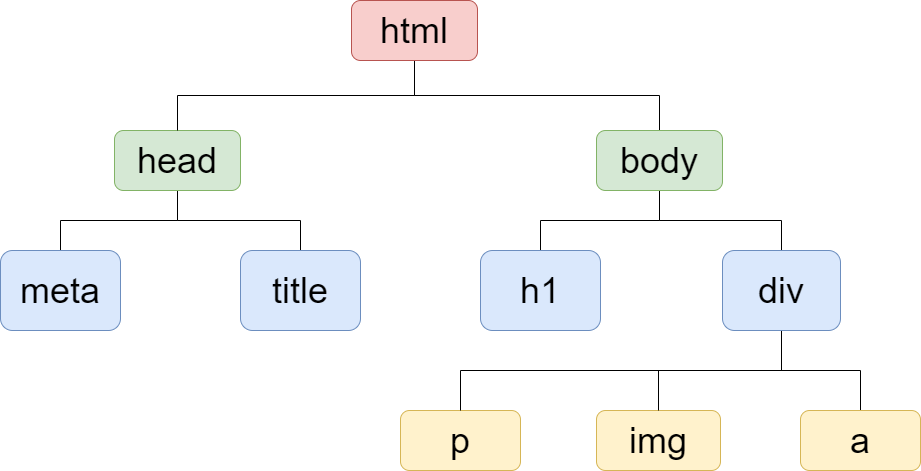

### 範例1 嘗試下載該網址http://ehappy.tw/bsdemo1.htm 的資訊

In [ ]:
import requests
url = 'http://ehappy.tw/bsdemo1.htm'
r = requests.get(url)
r.encoding = 'utf-8'
print(r.text) #得到網頁原始碼

### 範例2 提取結構中內容

In [ ]:
# 提出結構中內容

from bs4 import BeautifulSoup as bea
sp = bea(r.text, 'html.parser')
# sp.title # <title>我是網頁標題</title>
sp.title.text # 我是網頁標題

### 範例3

In [ ]:
import requests
from bs4 import BeautifulSoup as bea 

url = 'http://ehappy.tw/bsdemo2.htm'
r = requests.get(url)
r.encoding = 'utf-8'
sp = bea(r.text, 'html.parser')

In [ ]:
# 找段落2，兩種方法

# sp.find('p').text # 我是段落一
# sp.find_all('p')[0].text # 我是段落一

sp.find_all('p')[1].text # 我是段落二，方法1
sp.find('p', id='p2').text # 我是段落二，方法2

In [ ]:
# 找超連結文字，多種方法

sp.find_all('a')[1].text
sp.find('a', href="http://www.e-happy.com.tw").text
sp.find('li', class_='even').find('a').text
sp.find('li', class_='even').text
sp.find('li', class_='even').a.text

In [ ]:
# 取得屬性
# http://www.e-happy.com.tw
sp.find('li', class_='even').a['href'] 
sp.find('li', class_='even').a.get('href')

# https://www.w3.org/html/logo/downloads/HTML5_Logo_256.png
sp.img.get('src')
sp.img['src']
sp.find('img').get('src')
sp.find_all('img')[0].get('src')

# 四、爬蟲基礎_PTT
  * html排版乾淨，有規律
  * 廣為人知

### 範例1 爬取PTT美食版上面日期 網址 標題
  ex: 8/15 https://www.ptt.cc/bbs/Food/M.1660543864.A.D2F.html [食記][台南] 阿文豬心｜冬粉 豬肝 腰子 豬腳 豬尾巴 骨髓 排骨

In [ ]:
# 網址: https://www.ptt.cc/bbs/Food/index.html
import requests
from bs4 import BeautifulSoup
url = 'https://www.ptt.cc/bbs/Food/index.html'
r = requests.get(url)
r.encoding = 'utf-8'
sp = BeautifulSoup(r.text, 'html.parser')

datas = sp.find_all('div', class_="r-ent") # 查詢所有<div class="r-ent">
for data in datas: # 使用迴圈爬取一筆筆資料
  if data.a:  # 排除被刪除的文章(刪除後無網址可爬取，程式會報錯,debug)
    print(data.find('div', class_='date').text, end = ' ')
    print('https://www.ptt.cc' + data.a.get('href'), end = ' ')
    print(data.a.text)

### 範例1-1 爬取PTT美食版連續5頁資料

In [ ]:
import requests
from bs4 import BeautifulSoup
url = 'https://www.ptt.cc/bbs/Food/index.html'

for i in range(5):
  print('第{}頁'.format(i+1))
  r = requests.get(url)
  r.encoding = 'utf-8'
  sp = BeautifulSoup(r.text, 'html.parser')
  datas = sp.find_all('div', class_='r-ent')
  for data in datas:
    if data.a:
      print(data.find('div', class_='date').text, end = ' ')
      print('https://www.ptt.cc' + data.a.get('href'), end = ' ')
      print(data.a.text)
  url ='https://www.ptt.cc' + sp.find_all('a', class_='btn wide')[1].get('href')

### 範例2 針對cookie阻擋做出應對
  * 相對於美食版，額外需要認證才可訪問
  * 應用程式_Cookie_over18

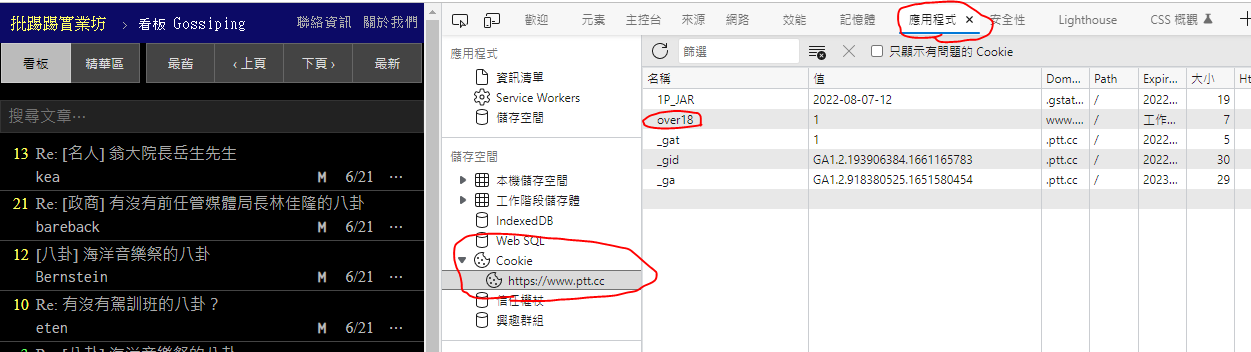

In [ ]:
# 設計cookie，讓程式能自動選擇並訪問該網站

import requests
from bs4 import BeautifulSoup
url = 'https://www.ptt.cc/bbs/Gossiping/index.html'
cookies = {'over18':'1'} #運用字典，填入查詢之名稱及值
for i in range(5):
  print('第{}頁'.format(i+1))
  r = requests.get(url, cookies = cookies) #存入變數cookies
  r.encoding = 'utf-8'
  sp = BeautifulSoup(r.text, 'html.parser')
  datas = sp.find_all('div', class_='r-ent')
  for data in datas:
    if data.a:
      print(data.find('div', class_='date').text, end = ' ')
      print('https://www.ptt.cc' + data.a.get('href'), end = ' ')
      print(data.a.text)
  url ='https://www.ptt.cc' + sp.find_all('a', class_='btn wide')[1].get('href')

### 範例3 爬取台灣彩券
  * https://www.taiwanlottery.com.tw/index_new.aspx

In [ ]:
# 威力彩期號、開獎號碼

import requests
from bs4 import BeautifulSoup

url = 'https://www.taiwanlottery.com.tw/index_new.aspx'
r = requests.get(url)
sp = BeautifulSoup(r.text, 'html.parser')

html = sp.find('div', class_="contents_box02") # 先找出所在區塊

# 從區塊往下搜尋資料
day = html.find('span', class_='font_black15').text # 111/8/22 第111000067期

balls = html.find_all('div', class_='ball_tx ball_green')

print("開獎順序")
for i in range(6):
  print(balls[i].text, end=",")
print("\n第二區:", end=" ")
print(html.find('div', class_='ball_red').text)
print("由小到大順序")
for i in range(6,12):
  print(balls[i].text, end=",")
print("\n第二區:", end=" ")
print(html.find('div', class_='ball_red').text)

In [ ]:
# 大樂透

import requests
from bs4 import BeautifulSoup

url = "https://www.taiwanlottery.com.tw/index_new.aspx"
r = requests.get(url)
sp = BeautifulSoup(r.text, "html.parser")

# 因區塊中class_="contents_box02"都一樣，故須針對第幾個區塊來爬取
# 若單純只用find，只能查找到第0個(威力彩)
# 威力彩為0，38樂合彩為1，大樂透為2，49樂合彩為3
# len = len(sp.find_all('div', class_="contents_box02")) # 可得知有幾個相同區塊

html = sp.find_all('div', class_="contents_box02")[2]
title = html.find('span', class_='font_black15').text
print(title)

balls = html.find_all('div', class_='ball_tx ball_yellow')

print("開獎順序")
for i in range(6):
  print(balls[i].text, end=",")
print("\n特別號:", end=" ")
print(html.find('div', class_='ball_red').text)
print("由小到大順序")
for i in range(6,12):
  print(balls[i].text, end=",")
print("\n特別號:", end=" ")
print(html.find('div', class_='ball_red').text)

### 範例4 爬取影城資料
  * 範例網站：https://srm.com.tw/%e9%9b%bb%e5%bd%b1%e7%b0%a1%e4%bb%8b/%e7%86%b1%e6%98%a0%e4%b8%ad/
  1. 電影名稱
  2. 上映日期
  3. 說明網址
  4. 海報照片(需下載並儲存在名為photot的資料夾)

In [ ]:
import requests
from bs4 import BeautifulSoup

url = "https://srm.com.tw/%e9%9b%bb%e5%bd%b1%e7%b0%a1%e4%bb%8b/%e7%86%b1%e6%98%a0%e4%b8%ad/"
r = requests.get(url)
sp = BeautifulSoup(r.text, "html.parser")

# 逐步聚焦article_h3_a，找到資料
# print(sp.find_all('article')[0].find('h3').a.text) # 獲得電影名稱
# print(sp.find_all('article')[0].find('h3').a.get('href')) # 獲得說明網址
# print(sp.find_all('article')[0].find('div', itemprop='text').text) # 上映日期

# 使用迴圈一次抓取
for i in range(12):
  print(sp.find_all('article')[i].find('h3').a.text) # 獲得電影名稱
  print(sp.find_all('article')[i].find('h3').a.get('href')) # 獲得說明網址
  print(sp.find_all('article')[i].find('div', itemprop='text').text) # 上映日期
  print("_" * 100) #用於分割每一筆影城資料

In [ ]:
# 抓取圖片
# sp.find_all('article')[0].img # 找到所需圖片範圍
# sp.find_all('article')[0].img['src'] # 抓取圖片

# 使用迴圈批次抓取圖片
for i in range(12):
  print(sp.find_all('article')[i].img['src'])

In [ ]:
# 抓取資料及圖片並儲存於資料夾

import os
if not os.path.exists('photos'): # 判斷是有存在名為photo資料夾
  os.mkdir('photos') # 若無則新增此資料夾

for i in range(len(sp.find_all('article'))): # 使用len查詢資料筆數，並用迴圈進行抓取
  print(sp.find_all('article')[i].find('h3').a.text) # 獲得電影名稱
  print(sp.find_all('article')[i].find('h3').a.get('href')) # 獲得說明網址
  print(sp.find_all('article')[i].find('div', itemprop='text').text) # 上映日期
  print(sp.find_all('article')[i].img['src'])
  # 設定打開路徑'photos/'，儲存格式'.jpg'，wb為寫入方式(因圖片為2進位)
  with open('photos/' + sp.find_all('article')[i].find('h3').a.text + '.jpg', 'wb') as f:
    f.write(requests.get(sp.find_all('article')[i].img['src']).content)

# 五、非同步載入爬蟲 Ajax
  * 第一次請求：僅傳Html資料(不含資料)
  * 第二次請求：才傳內容資料  
  【註】先有框架，然後再放入資料

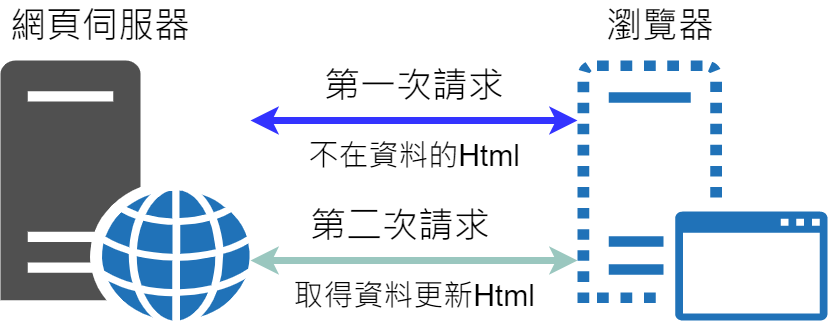

### 範例1
  * https://sites.google.com/cdc.gov.tw/2019ncov/taiwan

In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://sites.google.com/cdc.gov.tw/2019ncov/taiwan'
r = requests.get(url)
sp = BeautifulSoup(r.text, 'html.parser')
html = sp.find('div', class_='outbreak_info_number'))
# 非同步載入網站即使可正確訪問，但無法抓到資料

## 網路_Fetch/XHR
  * 可查找到非同步載入的資料，可發現資料是以Get方式取得資料
  * 資料內容可點選【預覽】找到

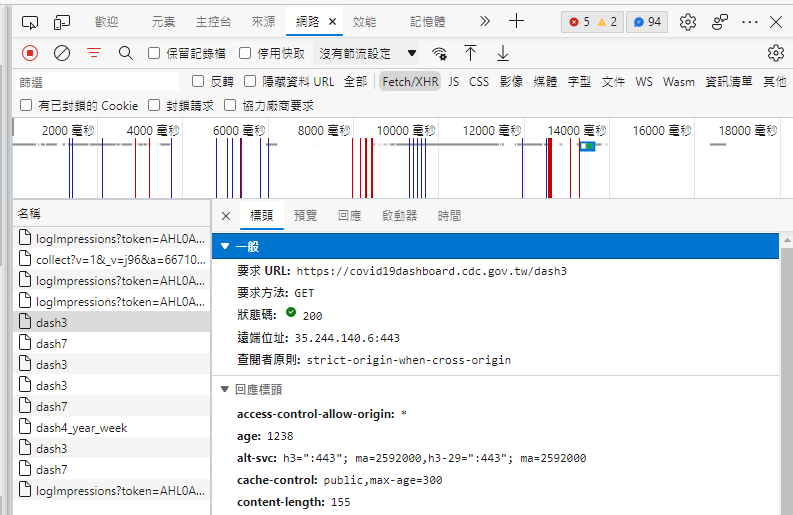

In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://covid19dashboard.cdc.gov.tw/dash3'
r = requests.get(url)
# r.text # 直接找非同步載入的網址，會獲得json格式

data = r.json() #將其轉換成json格式
print(data)
print(data['0']['死亡']) # 使用json語法查找資料